<a href="https://colab.research.google.com/github/suchismita-priya/airbnb_booking_analysis/blob/main/airbnb_booking_analysis_final_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** suchismita priyadarsinee

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique,
personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world.
Data analysis on millions of listings provided through Airbnb is a crucial factor for the company.
These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers'
and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **GitHub Link -**

https://github.com/suchismita-priya/airbnb_booking_analysis

# **Problem Statement**


**Write Problem Statement Here.**

>
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/My Drive/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Visualizing the missing values
import missingno as msno

<Axes: >

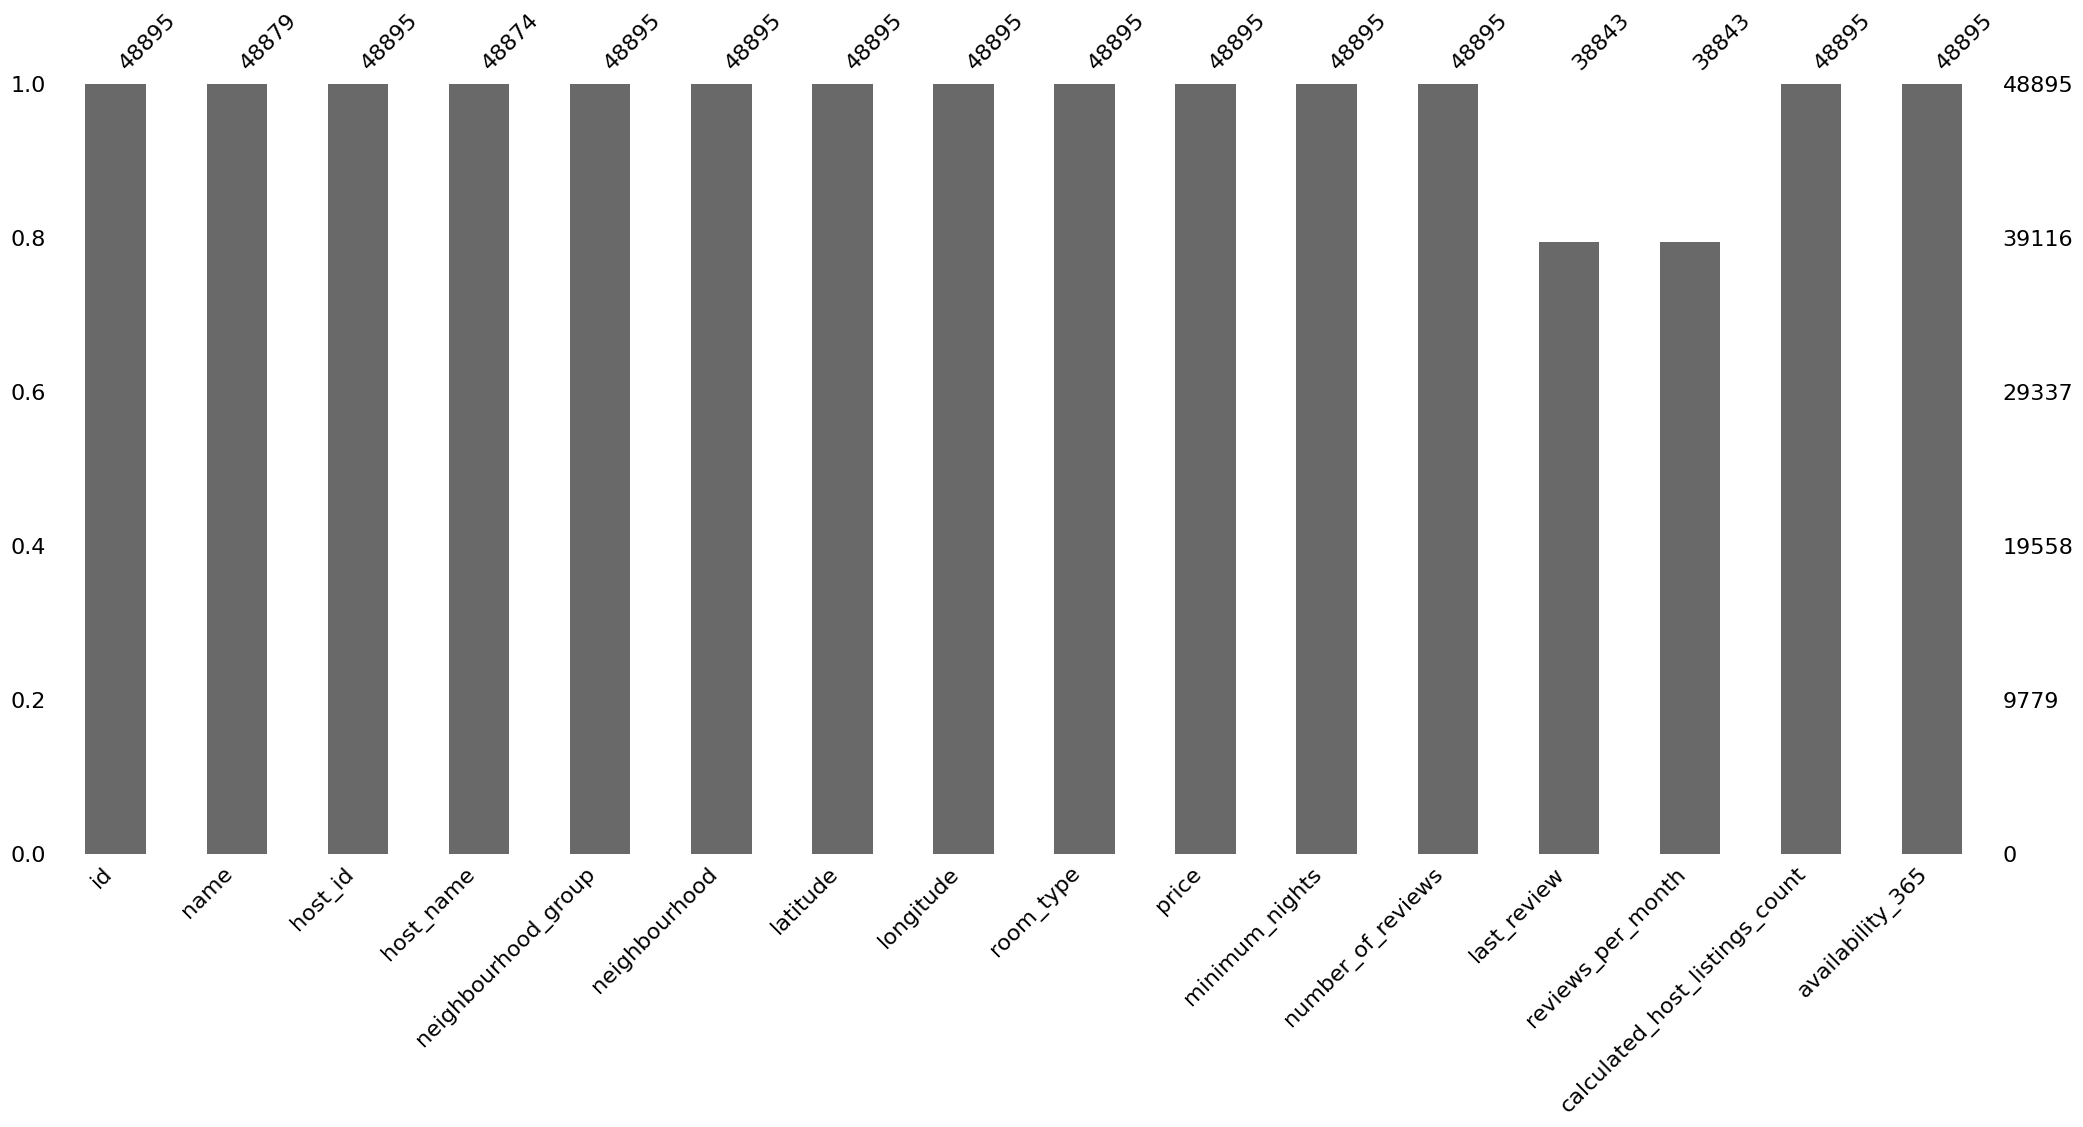

In [10]:
msno.bar(df)

### What did you know about your dataset?

we can see our dataset has 48895 data and 16 columns.

**id :** a unique id identifying an airbnb lisitng

**name :** name representing the accommodation

**host_id :** a unique id identifying an airbnb host

**host_name :** name under whom host is registered

**neighbourhood_group :** a group of area

**neighbourhood :** area falls under neighbourhood_group

**latitude :** coordinate of listing

**longitude :** coordinate of listing

**room_type :**  type to categorize listing rooms

**price :** price of listing

**minimum_nights :** the minimum nights required to stay in a single visit

**number_of_reviews :** total count of reviews given by visitors

**last_review :** date of last review given

**reviews_per_month :** rate of reviews given per month

**calculated_host_listings_count :** total no of listing registered under the host

**availability_365 :** the number of days for which a host is available in a year.

We can check there are 4 columns containing null values which are

**name,host_name,last_reviews, reviews_per_month.**

So we will just fillna(0) to those null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
column_to_count = df.columns
column_to_count

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for x in column_to_count:
  print(df[x].unique())

[    2539     2595     3647 ... 36485431 36485609 36487245]
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
[     2787      2845      4632 ... 274321313  23492952  68119814]
['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carro

In [14]:
df.nunique()

id                                48895
name                              47892
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


### What all manipulations have you done and insights you found?

##1. What can we learn about different hosts and areas?

In [16]:
host_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
host_areas.sort_values(by='calculated_host_listings_count',ascending = False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1833,Blueground,Manhattan,232
1832,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103
...,...,...,...
5820,Imelda,Queens,1
5821,Imma,Brooklyn,1
5822,Imogene,Manhattan,1
5825,Imran,Manhattan,1


From above we can see most number of listing are from Manhattan and host name is Sonder.

##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)



In [17]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [18]:
areas = areas_reviews['neighbourhood_group']
reviews = areas_reviews['number_of_reviews']

In [19]:
areas

0            Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: neighbourhood_group, dtype: object

In [20]:
reviews

0    321
1    488
2    607
3    629
4    333
Name: number_of_reviews, dtype: int64

Text(0.5, 1.0, 'review according to area')

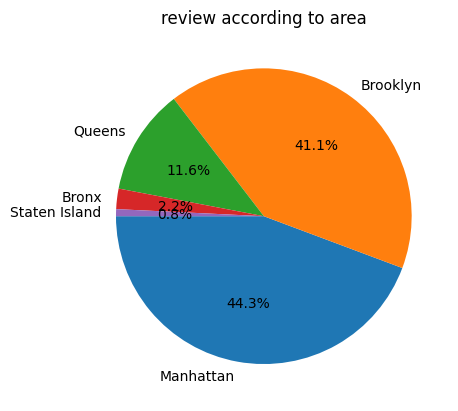

In [21]:
plt.pie(new_df.neighbourhood_group.value_counts(),labels=new_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.title('review according to area')

In [22]:
prices_reviews = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
prices_reviews

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
...,...,...
669,7703,0
670,8000,1
671,8500,2
672,9999,6


In [23]:
new_price = prices_reviews['price']
new_review = prices_reviews['number_of_reviews']

Text(0, 0.5, 'new review')

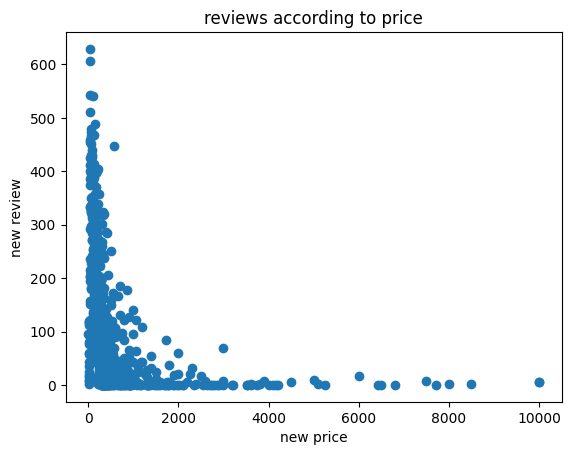

In [24]:
plt.scatter(new_price , new_review)
plt.title('reviews according to price')
plt.xlabel('new price')
plt.ylabel('new review')

From above we can see that most people like to stay where price is low.

##3.Which hosts are the busiest and why?

In [25]:
busy_host = new_df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busy_host.sort_values(by='number_of_reviews',ascending=False).head(10)

,host_id,host_name,room_type,number_of_reviews
24484,47621202,Dona,Private room,629
7707,4734398,Jj,Private room,607
22213,37312959,Maya,Private room,543
4590,2369681,Carol,Private room,540
19443,26432133,Danielle,Private room,510
13707,12949460,Asa,Entire home/apt,488
1974,792159,Wanda,Private room,480
5056,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18289,23591164,Angela,Private room,466


In [26]:
new_hostname = busy_host.sort_values(by='number_of_reviews',ascending=False)['host_name'].head(25)
new_noreview = busy_host.sort_values(by='number_of_reviews',ascending=False)['number_of_reviews'].head(25)

In [27]:
new_hostname

24484               Dona
7707                  Jj
22213               Maya
4590               Carol
19443           Danielle
13707                Asa
1974               Wanda
5056               Linda
161                 Dani
18289             Angela
897                Agnes
4501               Lloyd
4421                John
880                  Jon
1000      Dennis & Naoko
29862            Miss Dy
40              Shunichi
502             Waldemar
18030    Gurpreet  Singh
7986                Seth
1839        Gladys & Bob
6214         Janet-David
33397            Nalicia
1669               Seith
2294              Dennis
Name: host_name, dtype: object

In [28]:
new_noreview

24484    629
7707     607
22213    543
4590     540
19443    510
13707    488
1974     480
5056     474
161      467
18289    466
897      458
4501     454
4421     451
880      447
1000     441
29862    434
40       430
502      426
18030    424
7986     414
1839     414
6214     404
33397    403
1669     403
2294     401
Name: number_of_reviews, dtype: int64

In [29]:
import warnings

Text(0, 0.5, 'reviews')

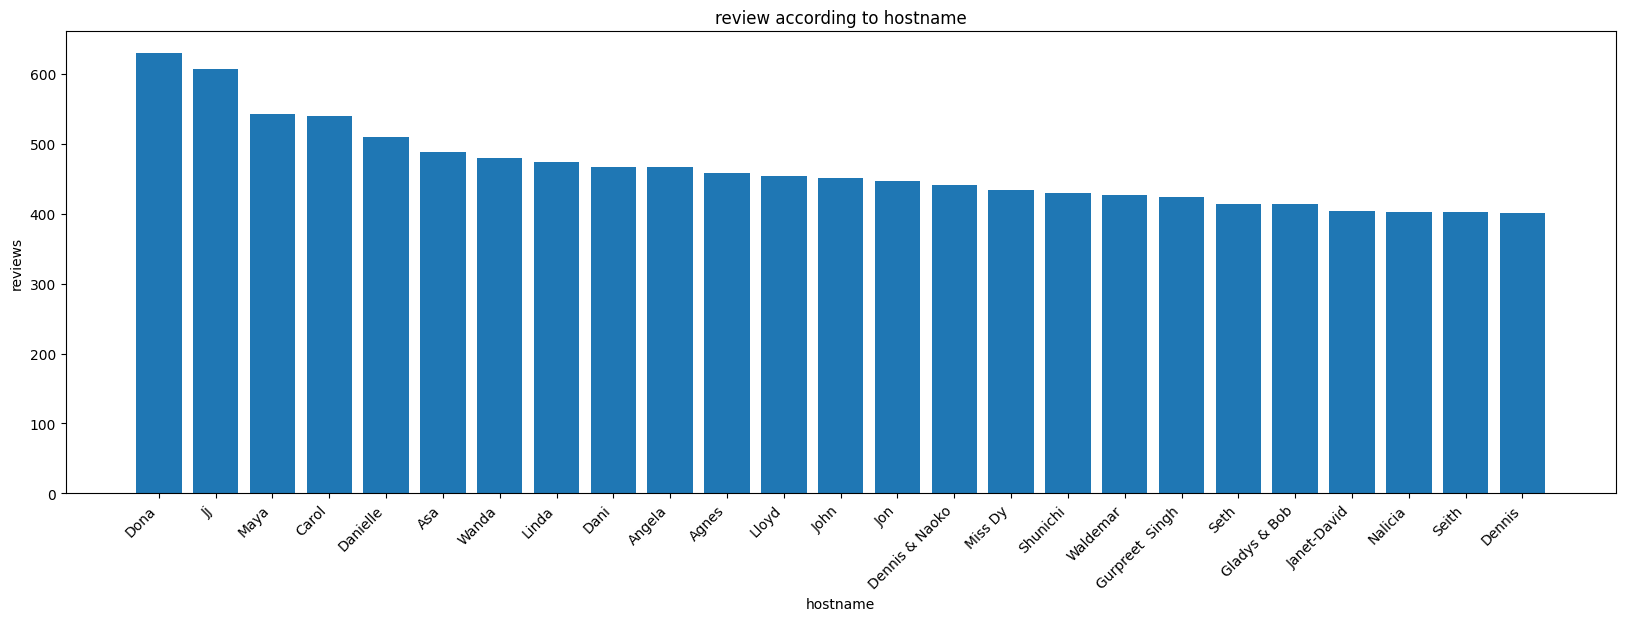

In [30]:
plt.figure(figsize=(20,6))
plt.bar(new_hostname , new_noreview)
warnings.filterwarnings("ignore")
plt.xticks(rotation=45,ha='right')
plt.title('review according to hostname')
plt.xlabel('hostname')
plt.ylabel('reviews')

From above we can see busy hosts are
1.   Dona
2.   Ji
3.   Maya
4.   Carol
5.   Danielle







##4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [31]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


Text(0.5, 1.0, 'Traffic Areas')

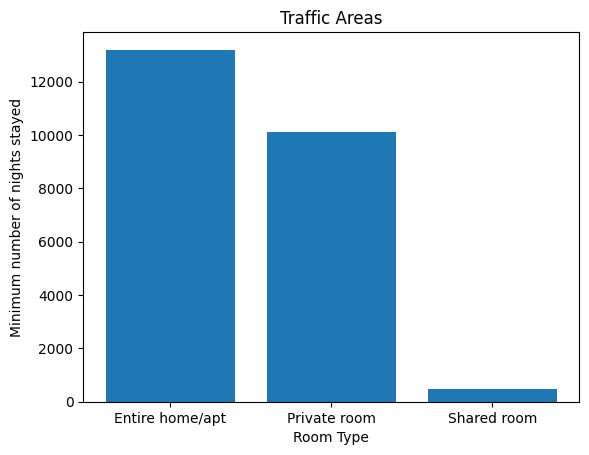

In [32]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

plt.bar(room_type, stayed)
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")

From above we can see people prefer to stay in home/apartment and private rooms.

# **Conclusion**

Write the conclusion here.
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***